# 선형 회귀

## 1. Python 패키지 Import

`numpy`와 `pyplot`을 사용하기 위해 패키지를 import 한다.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 2. 데이터 읽고 전처리하기
1단계: pandas로 파일 읽기  
2단계: 데이터 정제  
    
    방법  
* 데이터가 온전한지 체크하기  
* 수치형 데이터는 정규화 해주기
* 데이터 범주형 데이터가 있다면 숫자로 표현하기  
* 학습데이터 나누기

## 파일 읽기

In [11]:
data = pd.read_csv("../BasicML/regression/data/house_price-train.csv")

## 데이터 정제하기

###  데이터가 온전한지 체크하기

불필요한 ID 컬럼 날리기

In [12]:
data.drop(["Id"], axis=1, inplace=True)
display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


빠진 데이터가 있는지 체크

In [28]:
missing_values = data.select_dtypes('number').isnull().sum().sort_values(ascending=False)
print(missing_values)

GarageYrBlt      81
MasVnrArea        8
MSSubClass        0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
LotFrontage       0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64


값이 비어있는 데이터를 가지고 있는 숫자형 컬럼들 뽑기

In [38]:
missing_values_columns = data.select_dtypes('number').isnull().columns
print(missing_values_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


값이 비어있는 컬럼을 없애버리거나

In [151]:

data.drop(missing_values_columns, axis=1, inplace=True)
display(data)
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


MSSubClass      0
CentralAir      0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
               ..
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
SalePrice       0
Length: 61, dtype: int64


채워넣기

In [39]:
for col in missing_values_columns:
     data[col] = data[col].fillna(data.loc[:, col].mean())

##  데이터 정규화 하기

In [40]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
numeric_columns = data.select_dtypes('number').columns
data[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])
display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.00000,0.090909,0.50,WD,Normal,0.241078
1,0.000000,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.00000,0.363636,0.25,WD,Normal,0.203583
2,0.235294,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.00000,0.727273,0.50,WD,Normal,0.261908
3,0.294118,RL,0.133562,0.038561,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.00000,0.090909,0.00,WD,Abnorml,0.145952
4,0.235294,RL,0.215753,0.060576,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.00000,1.000000,0.50,WD,Normal,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.00000,0.636364,0.25,WD,Normal,0.194556
1456,0.000000,RL,0.219178,0.055505,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,MnPrv,NaN,0.00000,0.090909,1.00,WD,Normal,0.243161
1457,0.294118,RL,0.154110,0.036187,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,GdPrv,Shed,0.16129,0.363636,1.00,WD,Normal,0.321622
1458,0.000000,RL,0.160959,0.039342,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.00000,0.272727,1.00,WD,Normal,0.148903


##  데이터 범주형 데이터가 있다면 숫자로 표현하기

In [41]:
non_numeric_columns = data.select_dtypes(exclude='number').columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in non_numeric_columns:
    data[i] = label_encoder.fit_transform(data[i])

display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,3,0.150685,0.033420,1,2,3,3,0,4,...,0.0,3,4,4,0.00000,0.090909,0.50,8,4,0.241078
1,0.000000,3,0.202055,0.038795,1,2,3,3,0,2,...,0.0,3,4,4,0.00000,0.363636,0.25,8,4,0.203583
2,0.235294,3,0.160959,0.046507,1,2,0,3,0,4,...,0.0,3,4,4,0.00000,0.727273,0.50,8,4,0.261908
3,0.294118,3,0.133562,0.038561,1,2,0,3,0,0,...,0.0,3,4,4,0.00000,0.090909,0.00,8,0,0.145952
4,0.235294,3,0.215753,0.060576,1,2,0,3,0,2,...,0.0,3,4,4,0.00000,1.000000,0.50,8,4,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,3,0.140411,0.030929,1,2,3,3,0,4,...,0.0,3,4,4,0.00000,0.636364,0.25,8,4,0.194556
1456,0.000000,3,0.219178,0.055505,1,2,3,3,0,4,...,0.0,3,2,4,0.00000,0.090909,1.00,8,4,0.243161
1457,0.294118,3,0.154110,0.036187,1,2,3,3,0,4,...,0.0,3,0,2,0.16129,0.363636,1.00,8,4,0.321622
1458,0.000000,3,0.160959,0.039342,1,2,3,3,0,4,...,0.0,3,4,4,0.00000,0.272727,1.00,8,4,0.148903


##  학습데이터와 검증데이터로 나누기

In [52]:
from sklearn.model_selection import train_test_split

numeric_data = data[numeric_columns]

X = numeric_data.loc[:, numeric_data.columns != 'SalePrice']
Y = numeric_data.loc[:, numeric_data.columns == 'SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# 모델 만들고 학습 및 검증하기
## 1. 모델 만들기

In [56]:
from tensorflow.keras.models import Sequential # keras의 Sequential()을 임포트
from tensorflow.keras.layers import Dense, Dropout # keras의 Dense()를 임포트
from tensorflow.keras import optimizers # keras의 옵티마이저를 임포트

# Sequential()로 model이라는 이름의 모델 객체을 만듭니다.
model = Sequential()

model.add(Dense(512, input_dim=len(numeric_data.columns) - 1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 모델 모양 확인
model.summary()

# optimer로는 adam, lr=0.5
adam = optimizers.Adam(learning_rate=0.3)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=adam, loss='mse', metrics=['mse'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               18944     
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 109,441
Trainable params: 109,441
Non-trainable params: 0
_________________________________________________________________


## 2. 학습하기

In [57]:
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 1000번 시도합니다.
model.fit(X_train, Y_train, batch_size=64, epochs=500, shuffle=True,
          validation_data=(X_test, Y_test))

Epoch 1/500


16/16 [==============================] - 1s 19ms/step - loss: 2420515584.0000 - mse: 2420515584.0000 - val_loss: 53.8596 - val_mse: 53.8596
Epoch 2/500
16/16 [==============================] - 0s 8ms/step - loss: 22.5262 - mse: 22.5262 - val_loss: 8.1885 - val_mse: 8.1885
Epoch 3/500
16/16 [==============================] - 0s 7ms/step - loss: 5.5929 - mse: 5.5929 - val_loss: 4.7000 - val_mse: 4.7000
Epoch 4/500
16/16 [==============================] - 0s 7ms/step - loss: 1.4363 - mse: 1.4363 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 5/500
16/16 [==============================] - 0s 7ms/step - loss: 0.2474 - mse: 0.2474 - val_loss: 0.1832 - val_mse: 0.1832
Epoch 6/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 7/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 8/500
16/16 [==============================] - 0s 6ms/step - loss:

## 3. 모델 검증하기

14/14 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331
[0.0330817811191082, 0.0330817811191082]
14/14 [==============================] - 0s 1ms/step


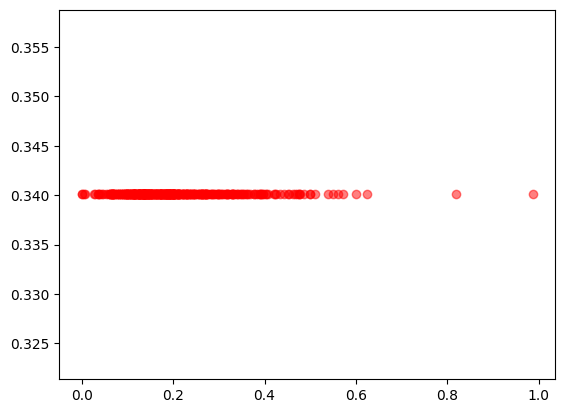

In [79]:
score = model.evaluate(X_test, Y_test)
print(score)

Y_predict = model.predict(X_test)
plt.figure()
plt.scatter(Y_test, Y_predict, alpha=.5, c=['r'])
plt.show()